# First Steps

Goal: getting to know basic syntax and data types.

We start with importing needed modules:

In [3]:
import torch
import math
import matplotlib.pyplot as plt

Next, we define training data. Here we will sample 2000 x-values between -pi and pi.
We define two models as follows: each sample will consist of a specific `x` sample to the `1,2,3` power OR just plain `x` and the label will be `sin(x)`.

input is one of: 
<ol>
    <li>x </li>
    <li>[x^1, x^2, x^2] </li>
</ol>
labels are:
<ol>
    <li>sin(x) for both cases</li>
</ol>

We generate samples (i.e. inputs and labels) of 3 different sizes:
<ol>
    <li>500</li>
    <li>4000</li>
</ol>


In [37]:
n_samples_1 = 50
n_samples_2 = 4000

n_samples = n_samples_2
x_1 = torch.linspace(-math.pi, math.pi, n_samples)
y = torch.sin(x_1)
p = torch.tensor([1, 2, 3])
x_1 = x_1.unsqueeze(-1)
x_2 = x_1.pow(p)

### We now define our model.

### We need layers and a loss.
### This is a linear model and we do not need an activation function!

In [38]:
model_1 = torch.nn.Sequential(
    torch.nn.Linear(1, 1),
    torch.nn.Flatten(0, 1)
)
model_2 = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

In [46]:
learning_rate = 1e-6
for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred_1 = model_1(x_1)
    y_pred_2 = model_2(x_2)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the loss.
    loss_1 = loss_fn(y_pred_1, y)
    loss_2 = loss_fn(y_pred_2, y)
    if t % 100 == 99:
        print(f"\rtime = {t:.2f}: loss (model 1): {loss_1.item():.4f} | (model 2): {loss_2.item():.4f})", end="\n")

    # Zero the gradients before running the backward pass.
    model_1.zero_grad()
    model_2.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss_1.backward()
    loss_2.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model_1.parameters():
            param -= learning_rate * param.grad
    with torch.no_grad():
        for param in model_2.parameters():
            param -= learning_rate * param.grad

time = 99.00: loss (model 1): 784.8618 | (model 2): 17.5976)
time = 199.00: loss (model 1): 784.8618 | (model 2): 17.5975)
time = 299.00: loss (model 1): 784.8618 | (model 2): 17.5975)
time = 399.00: loss (model 1): 784.8618 | (model 2): 17.5974)
time = 499.00: loss (model 1): 784.8618 | (model 2): 17.5974)
time = 599.00: loss (model 1): 784.8618 | (model 2): 17.5974)
time = 699.00: loss (model 1): 784.8618 | (model 2): 17.5974)
time = 799.00: loss (model 1): 784.8618 | (model 2): 17.5974)
time = 899.00: loss (model 1): 784.8618 | (model 2): 17.5974)
time = 999.00: loss (model 1): 784.8618 | (model 2): 17.5974)
time = 1099.00: loss (model 1): 784.8618 | (model 2): 17.5974)
time = 1199.00: loss (model 1): 784.8618 | (model 2): 17.5974)
time = 1299.00: loss (model 1): 784.8618 | (model 2): 17.5974)
time = 1399.00: loss (model 1): 784.8618 | (model 2): 17.5974)
time = 1499.00: loss (model 1): 784.8618 | (model 2): 17.5974)
time = 1599.00: loss (model 1): 784.8618 | (model 2): 17.5974)
tim

In [47]:
# You can access the first layer of `model` like accessing the first item of a list
linear_layer_1 = model_1[0]
linear_layer_2 = model_2[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result (model 1): y = {linear_layer_1.bias.item():.6f} + {linear_layer_1.weight[:, 0].item():.6f} x')
print(f'Result (model 2): y = {linear_layer_2.bias.item():.6f} + {linear_layer_2.weight[:, 0].item():.6f} x + {linear_layer_2.weight[:, 1].item():.6f} x^2 + {linear_layer_2.weight[:, 2].item():.6f} x^3')
print(f'True            : y = {0:.6f} + {1:.6f} x + {0:.6f} x^2 - {1.0 /(2*3):.6f} x^3 + {0:6f} x^4 - {1.0 / (2*3*4*5)} x^5')

Result (model 1): y = -0.000000 + 0.303735 x
Result (model 2): y = -0.000000 + 0.856855 x + 0.000000 x^2 + -0.093358 x^3
True            : y = 0.000000 + 1.000000 x + 0.000000 x^2 - 0.166667 x^3 + 0.000000 x^4 - 0.008333333333333333 x^5


## We can also plot the **ground truth** (training data) and predictions 

Lets first configure matplotlib. You can copy over most of the plotting setup to later examples.

Also: the predictions from above are still stored inside torch tensors and may even be located on a gpu. Lets fetch them back into numpy arrays.

In [48]:
params = {
   'axes.labelsize': 18,
   'font.size': 18,
   'legend.fontsize': 18,
   'xtick.labelsize': 18,
   'ytick.labelsize': 18,
   'text.usetex': False,
   'figure.figsize': [10, 6]
   }
plt.rcParams.update(params)
y_pred_1_np = y_pred_1.detach().numpy()
y_pred_2_np = y_pred_2.detach().numpy()

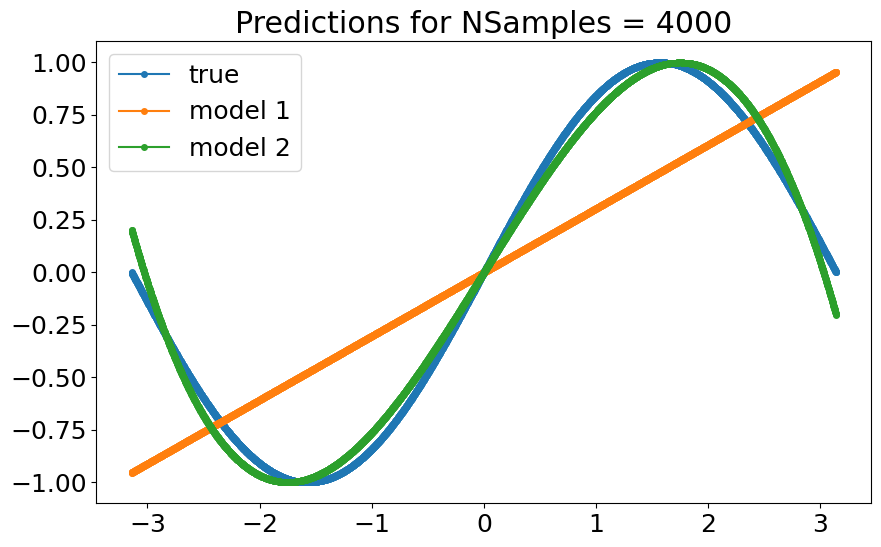

In [49]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(x_1, y, label="true", marker=".", markersize=8)
ax.plot(x_1, y_pred_1_np, label=f"model 1", marker=".", markersize=8)
ax.plot(x_1, y_pred_2_np, label=f"model 2", marker=".", markersize=8)
ax.set_title(f"Predictions for NSamples = {n_samples}")
ax.legend()

## Optimizing the Optimizer

Instead of going a fixed rate in the direction of the steepest descent, we can abstract to the concept of an **Optimizer**. 
This is a generic algorithm, that is supposed to find some sort of minimum in the lass landscape.
Different optimizers have different strengths and weaknesse, also in combination with their respective parameters (we will discuss more of that in the context of **Hyperparameter Tuing**)

A list of available optimizers in PyTorch can be found in the [documentation](https://pytorch.org/docs/stable/optim.html)

First, we redefine the model. Models are stateful! Make sure to either reset or redefine them to not continue with old parameters.

In [50]:
model_1_opt = torch.nn.Sequential(
    torch.nn.Linear(1, 1),
    torch.nn.Flatten(0, 1)
)
model_2_opt = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

In [66]:
learning_rate = 1e-4
# Other common optimziers: SGD, Adam
optimizer_1 = torch.optim.RMSprop(model_1_opt.parameters(), lr=learning_rate)
optimizer_2 = torch.optim.RMSprop(model_2_opt.parameters(), lr=learning_rate)
for t in range(2000):
    y_pred_1_opt = model_1_opt(x_1)
    y_pred_2_opt = model_2_opt(x_2)

    loss_1_opt = loss_fn(y_pred_1_opt, y)
    loss_2_opt = loss_fn(y_pred_2_opt, y)
    if t % 100 == 99:
        print(f"\rtime = {t:.2f}: loss (model 1): {loss_1_opt.item():.4f} | (model 2): {loss_2_opt.item():.4f})", end="\n")

    optimizer_1.zero_grad()
    optimizer_2.zero_grad()

    loss_1_opt.backward()
    loss_2_opt.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer_1.step()
    optimizer_2.step()


time = 99.00: loss (model 1): 784.8617 | (model 2): 17.5974)
time = 199.00: loss (model 1): 784.8617 | (model 2): 17.5975)
time = 299.00: loss (model 1): 784.8618 | (model 2): 17.6196)
time = 399.00: loss (model 1): 784.8617 | (model 2): 17.5974)
time = 499.00: loss (model 1): 784.8618 | (model 2): 17.5977)
time = 599.00: loss (model 1): 784.8618 | (model 2): 17.5980)
time = 699.00: loss (model 1): 784.8617 | (model 2): 17.5983)
time = 799.00: loss (model 1): 784.8618 | (model 2): 17.5993)
time = 899.00: loss (model 1): 784.8618 | (model 2): 17.5997)
time = 999.00: loss (model 1): 784.8618 | (model 2): 17.5991)
time = 1099.00: loss (model 1): 784.8618 | (model 2): 17.5990)
time = 1199.00: loss (model 1): 784.8617 | (model 2): 17.5992)
time = 1299.00: loss (model 1): 784.8618 | (model 2): 17.5993)
time = 1399.00: loss (model 1): 784.8618 | (model 2): 17.5992)
time = 1499.00: loss (model 1): 784.8618 | (model 2): 17.5992)
time = 1599.00: loss (model 1): 784.8618 | (model 2): 17.5992)
tim

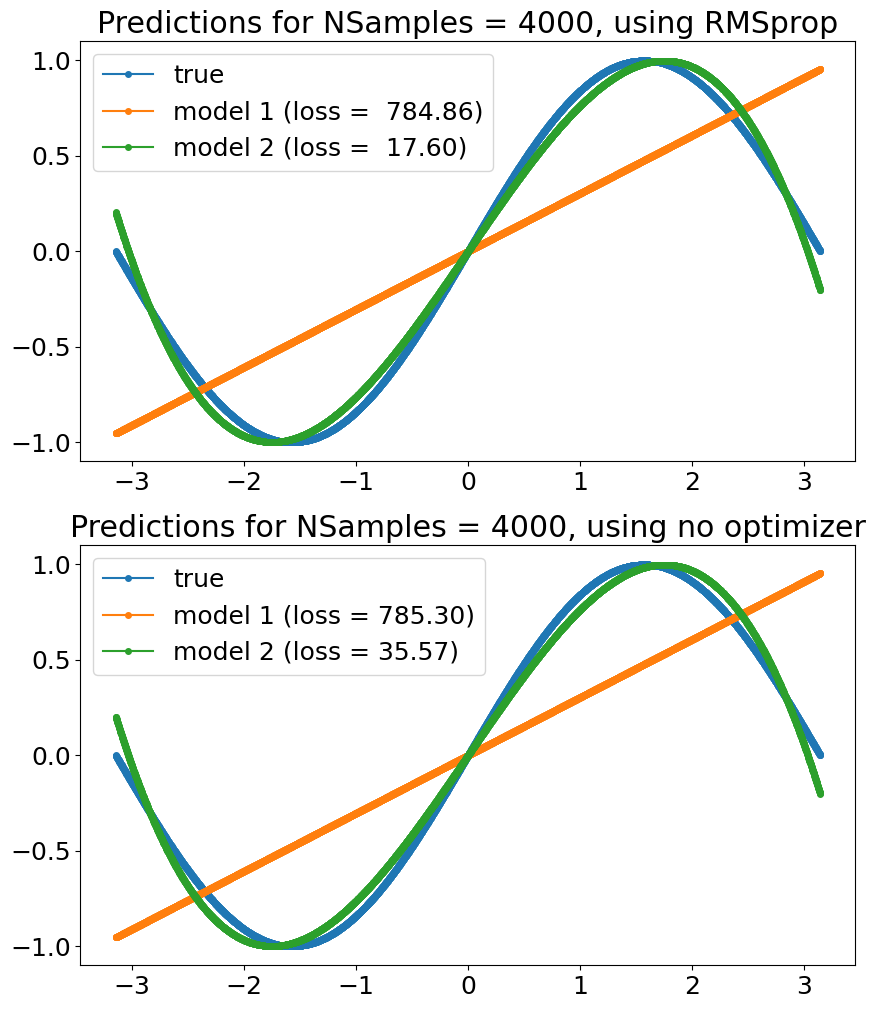

In [67]:
y_pred_1_opt_np = y_pred_1_opt.detach().numpy()
y_pred_2_opt_np = y_pred_2_opt.detach().numpy()

fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(211)
ax.plot(x_1, y, label="true", marker=".", markersize=8)
ax.plot(x_1, y_pred_1_opt_np, label=f"model 1 (loss =  {loss_1_opt:.2f})", marker=".", markersize=8)
ax.plot(x_1, y_pred_2_opt_np, label=f"model 2 (loss =  {loss_2_opt:.2f})", marker=".", markersize=8)
ax.set_title(f"Predictions for NSamples = {n_samples}, using RMSprop")
ax.legend()

ax = fig.add_subplot(212)
ax.plot(x_1, y, label="true", marker=".", markersize=8)
ax.plot(x_1, y_pred_1_np, label=f"model 1 (loss = {loss_1:.2f})", marker=".", markersize=8)
ax.plot(x_1, y_pred_2_np, label=f"model 2 (loss = {loss_2:.2f})", marker=".", markersize=8)
ax.set_title(f"Predictions for NSamples = {n_samples}, using no optimizer")
ax.legend()

# Next: Template for project structure and actual network